In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
carData = pd.read_csv("CarPrice_Assignment.csv")
carData

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [11]:
x_train = carData.stroke.values
y_train = carData.horsepower.values

In [12]:
def compute_sum(x,y,w,b):
    m = x.shape[0]
    cost = 0
    
    for i in range(m):
        f_wb = w*x[i]+b
        cost = cost + (f_wb - y[i])**2
        total_cost = 1/(2*m)*cost
    return total_cost

In [13]:
def compute_gradient(x,y,w,b):
    m = x.shape[0]
    dJ_dw = 0
    dJ_db = 0
    
    for i in range(m):
        f_wb = w*x[i]+b
        dJ_dw_i = (f_wb - y[i])*x[i]
        dJ_db_i = (f_wb - y[i])
        dJ_dw += dJ_dw_i
        dJ_db += dJ_db_i
    dJ_dw = dJ_dw/m
    dJ_db = dJ_db/m
    return dJ_dw, dJ_db

In [14]:
def gradient_descent(x,y,w_in,b_in,learning_rate,iterations):
    w = w_in
    b = b_in
    
    for i in range(iterations):
        dJ_dw, dJ_db = compute_gradient(x,y,w,b)
        w = w - learning_rate*dJ_dw
        b = b - learning_rate*dJ_db
    if i % 100 == 0 or i == iterations - 1:
        cost = compute_sum(x, y, w, b)
        print(f"Iteration {i+1}: Cost = {cost:.4f}, w = {w:.4f}, b = {b:.4f}")
    return w,b

In [16]:
w_in = 0
b_in = 0
learning_rate = 0.001
iterations = 6000

w_final,b_final = gradient_descent(x_train,y_train,w_in,b_in,learning_rate,iterations)
print(w_final)
print(b_final)

Iteration 6000: Cost = 788.8791, w = 28.1745, b = 11.9035
28.17448010182095
11.90352334771842


In [17]:
#implement checking process
def impliment(w,x,b):
    return w*x+b

In [18]:
#model predictions
y_train_predict = impliment(w_final,x_train,b_final)

In [20]:
y_max = max(max(y_train), max(y_train_predict))
y_min = min(min(y_train), min(y_train_predict))
y = np.linspace(y_min,y_max,500)
x = y

Text(0, 0.5, 'predicted values')

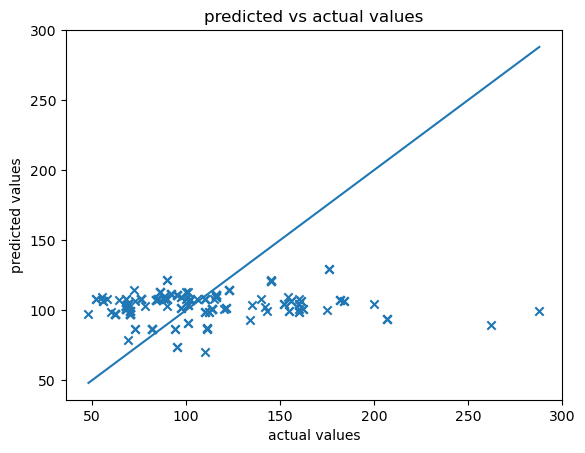

In [21]:
plt.scatter(y_train,y_train_predict,marker='x')
plt.plot(x,y)
plt.title("predicted vs actual values")
plt.xlabel("actual values")
plt.ylabel("predicted values")

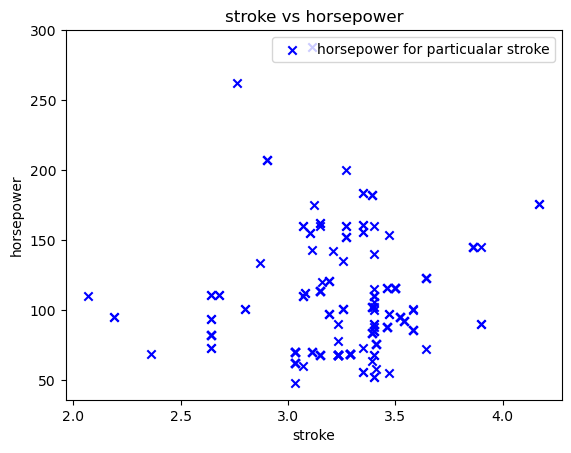

In [22]:
plt.scatter(x_train,y_train,marker='x',c='b',label = "horsepower for particualar stroke")
plt.title("stroke vs horsepower")
plt.xlabel("stroke")
plt.ylabel("horsepower")
plt.legend()

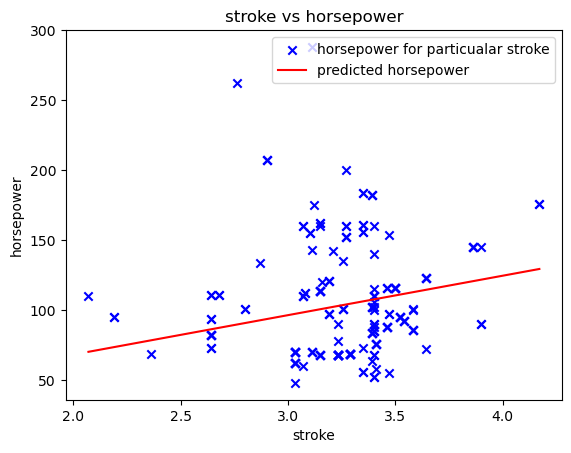

In [23]:
plt.scatter(x_train,y_train,marker='x',c='b',label = "horsepower for particualar stroke")
x_line = np.linspace(min(x_train),max(x_train), 100)
y_line = w_final*x_line + b_final
plt.plot(x_line,y_line,c='r', label = "predicted horsepower")
plt.title("stroke vs horsepower")
plt.xlabel("stroke")
plt.ylabel("horsepower")
plt.legend()